### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_80 = pd.read_csv('Patient 80_data.csv')

In [3]:
patient_80.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.030166,0.150221,0.399898,0.790302,1.486228,13.232258,1.870677,1.131482,1.032234,1.006095,...,1.629511,1.859298,1.429532,1.995860,0.876930,1.353883,1.847703,2.073499,1.970888,52.495089
std,0.006323,0.011938,0.012187,0.014086,0.018133,10.830172,0.861264,0.137138,0.016985,0.001279,...,0.031549,0.015393,0.026312,0.015201,0.036880,0.027595,0.014499,0.000450,0.002704,13.558251
min,0.011592,0.106650,0.353544,0.767314,1.376553,5.104165,1.193322,1.068247,1.021378,0.968674,...,1.553773,1.826345,1.356126,1.954676,0.616256,1.288137,1.821330,2.072058,1.962813,32.300000
25%,0.027104,0.144668,0.392541,0.782434,1.474819,7.488486,1.434105,1.076036,1.024561,1.005831,...,1.609583,1.847413,1.413241,1.985265,0.860144,1.335176,1.836994,2.073193,1.969060,42.700000
50%,0.030206,0.150388,0.397868,0.786663,1.477700,8.855016,1.490868,1.082020,1.026013,1.006287,...,1.627571,1.860327,1.428415,1.997214,0.879796,1.352364,1.844493,2.073512,1.970856,48.400000
75%,0.034516,0.155974,0.404147,0.793667,1.498216,14.289891,1.690577,1.098149,1.028933,1.006549,...,1.649858,1.869482,1.446765,2.007539,0.899040,1.372790,1.856500,2.073801,1.972951,58.400000
max,0.048210,0.187582,0.452859,0.860082,1.545364,70.808726,5.741627,2.034634,1.128054,1.026639,...,1.705225,1.910834,1.516529,2.027068,1.003211,1.423730,1.885149,2.075091,1.977411,97.100000


In [4]:
X=patient_80.drop('BIS', axis=1)
y= patient_80['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

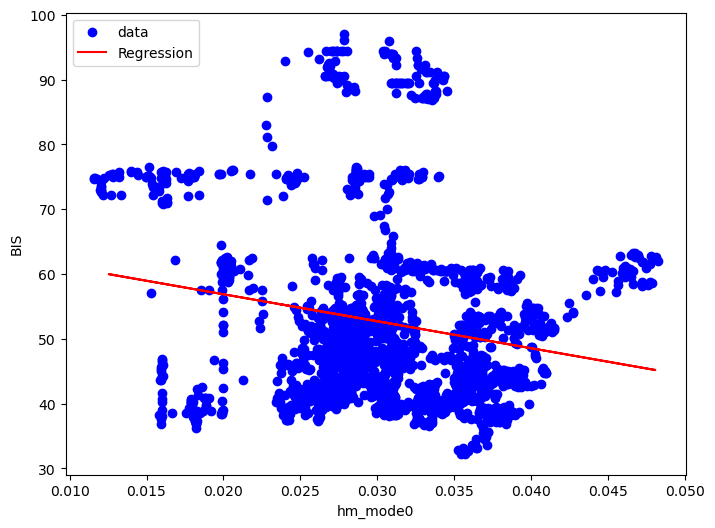

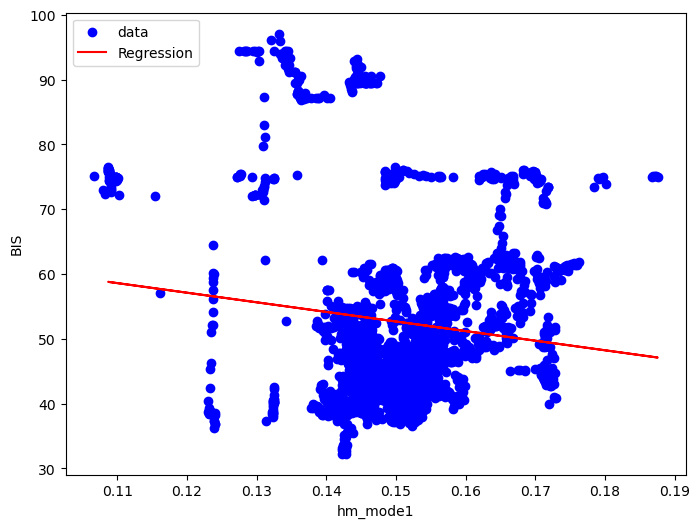

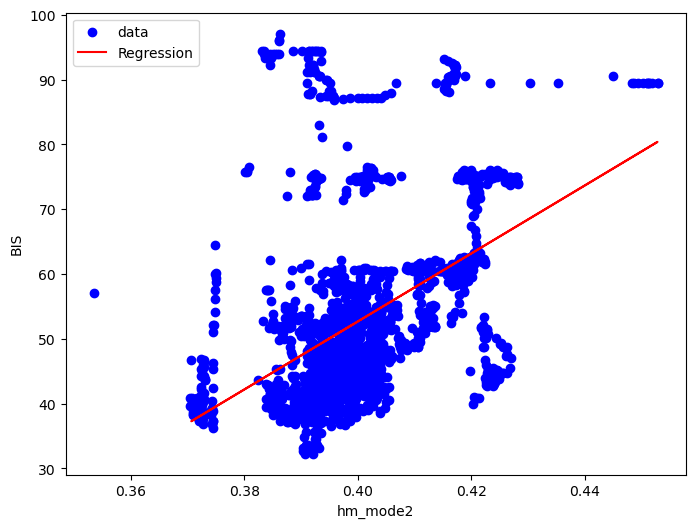

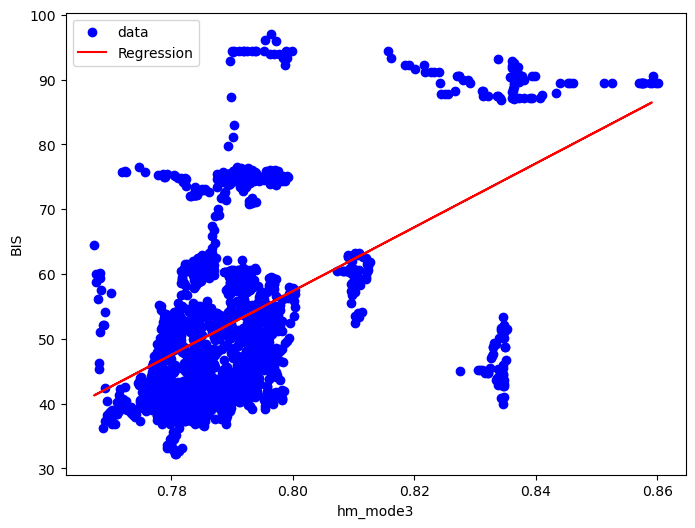

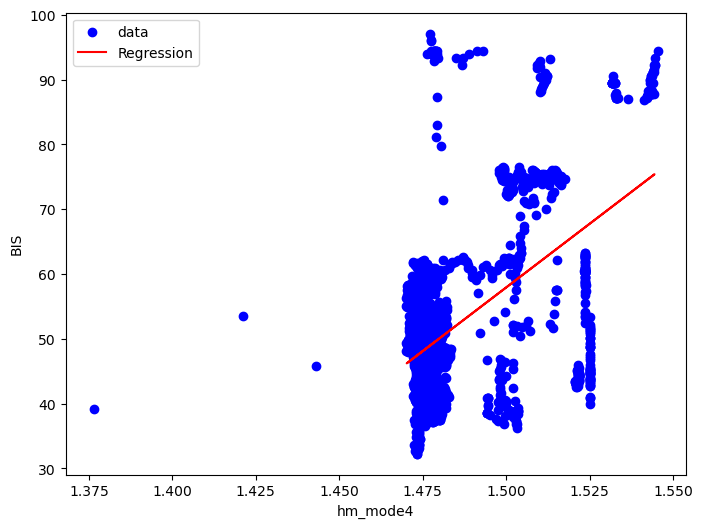

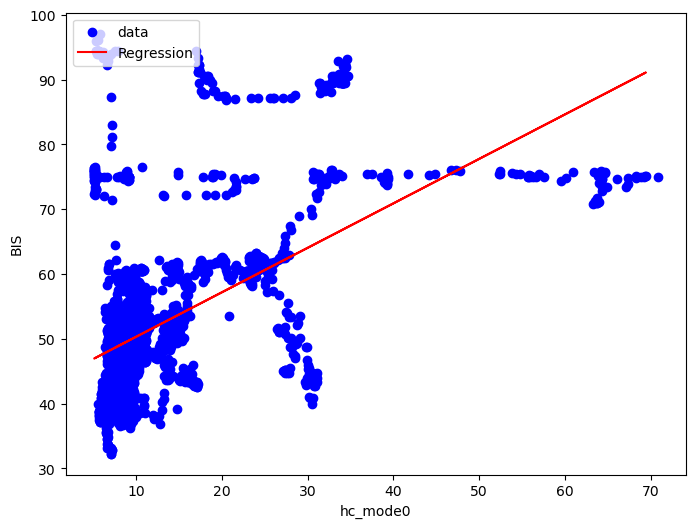

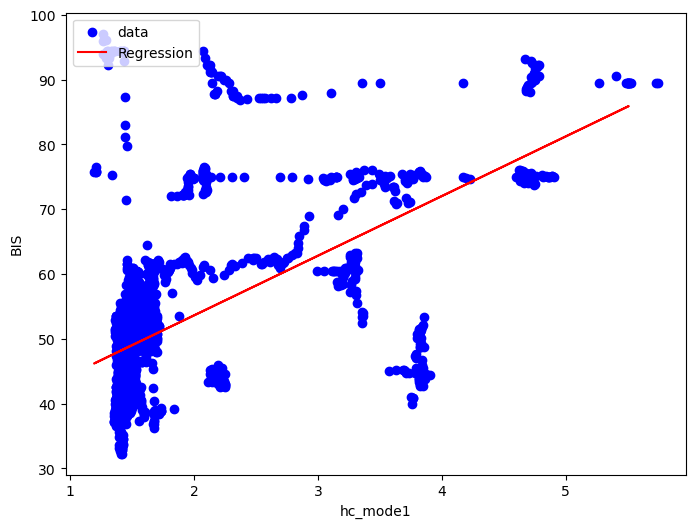

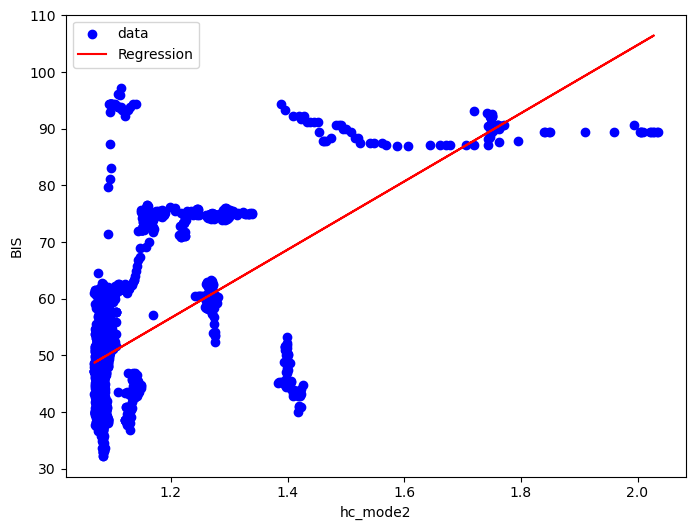

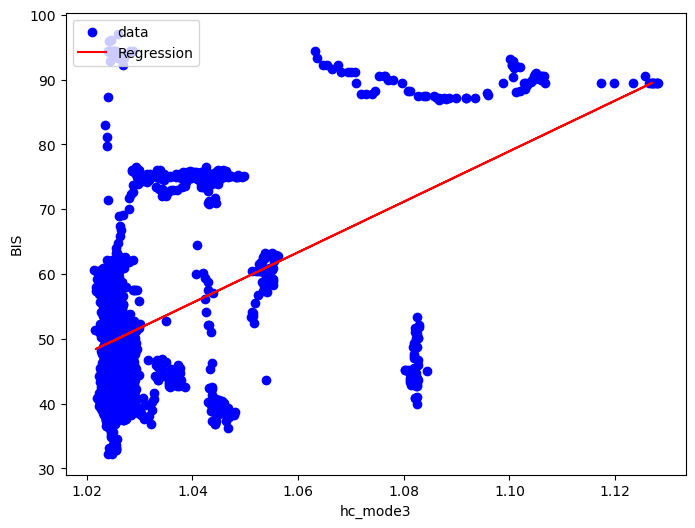

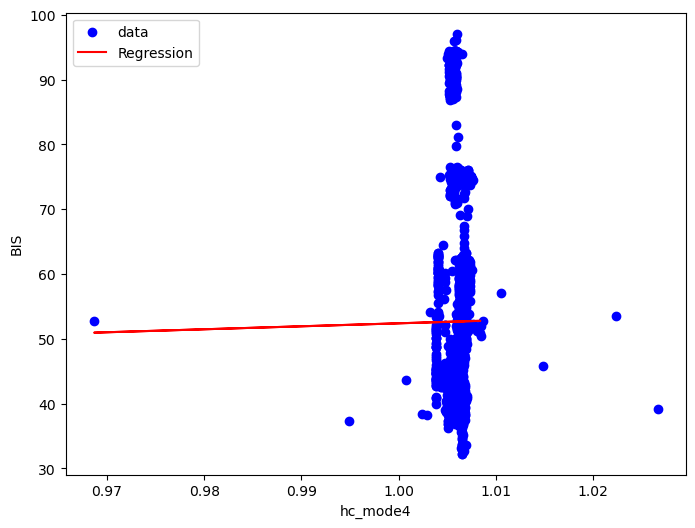

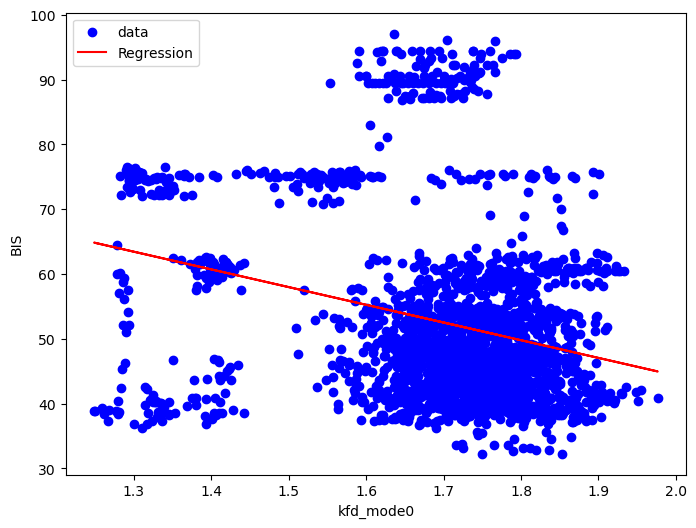

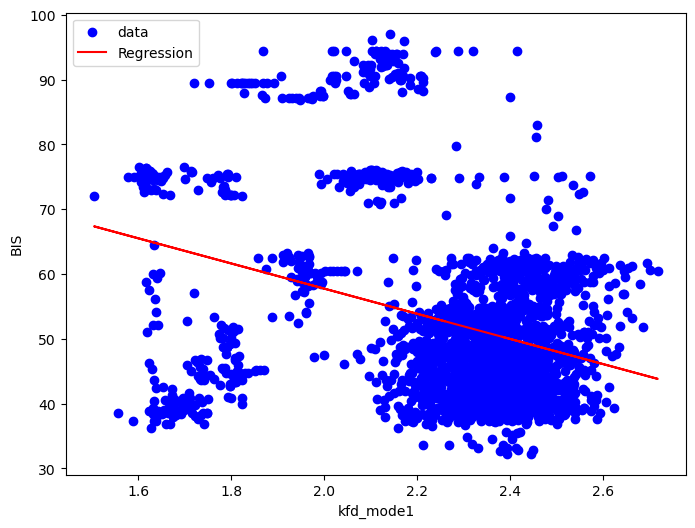

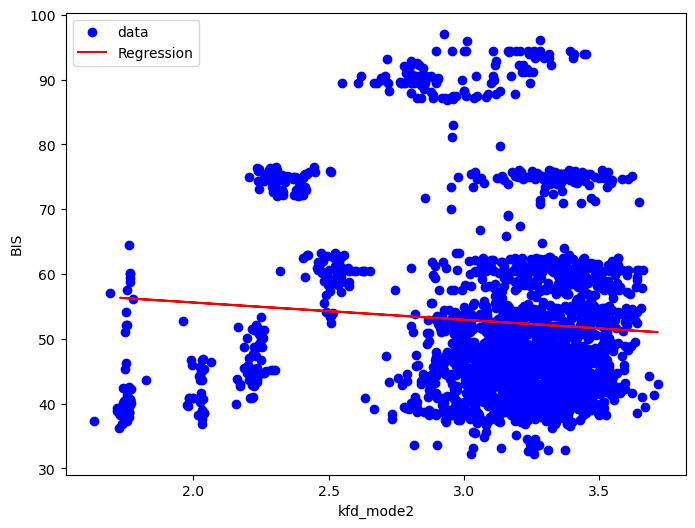

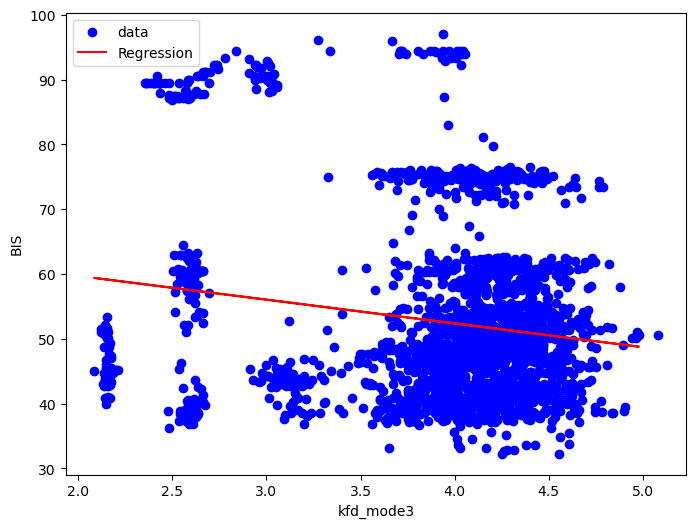

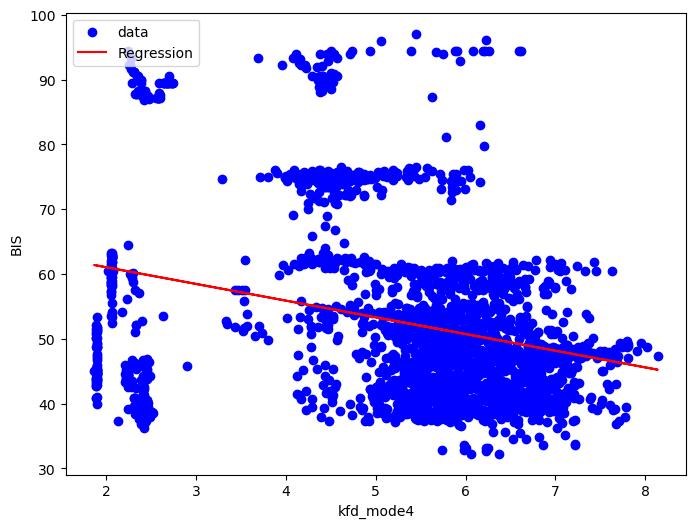

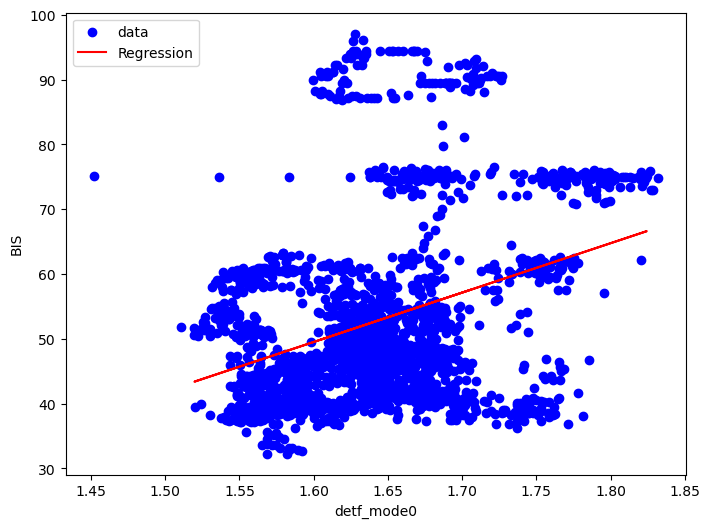

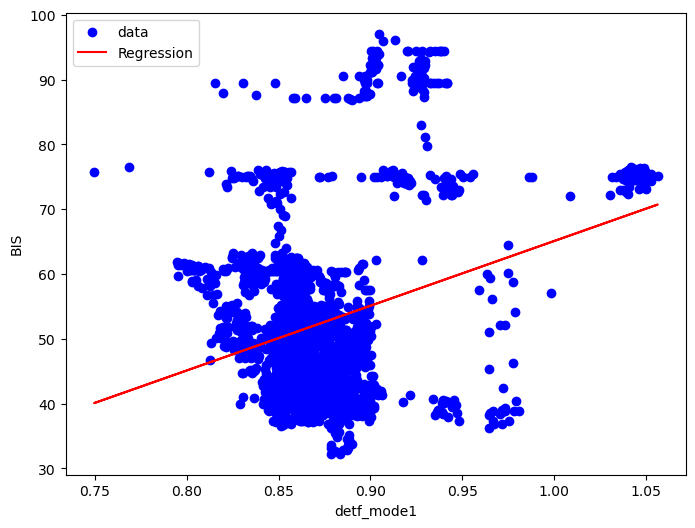

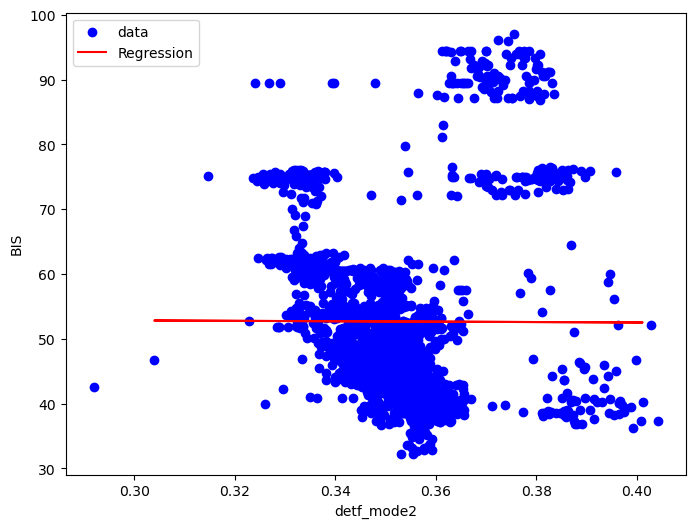

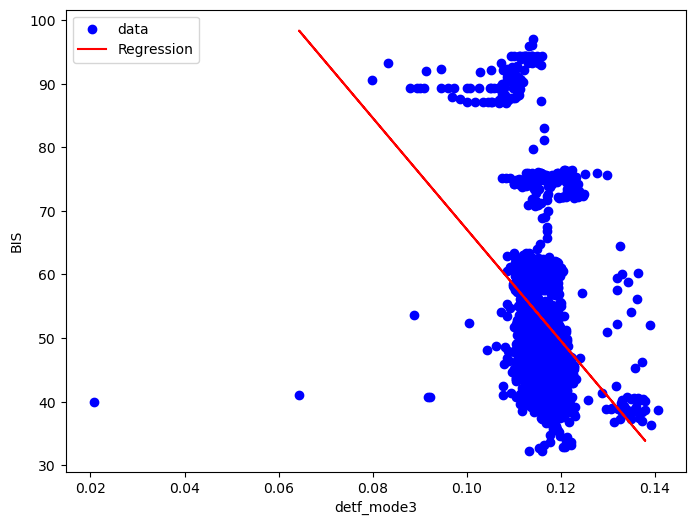

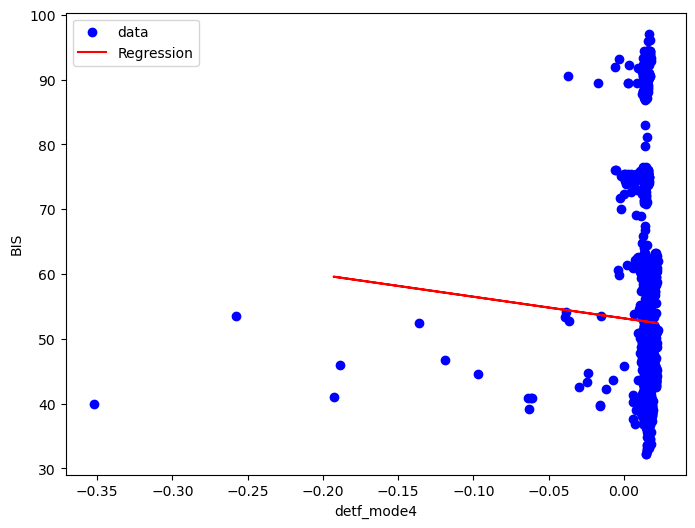

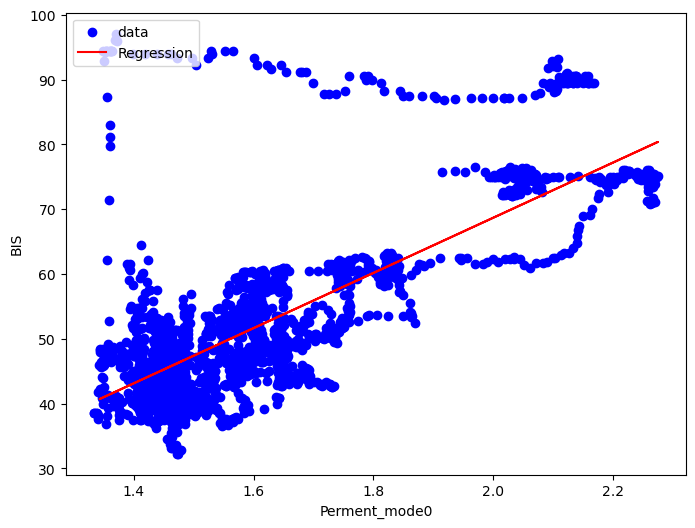

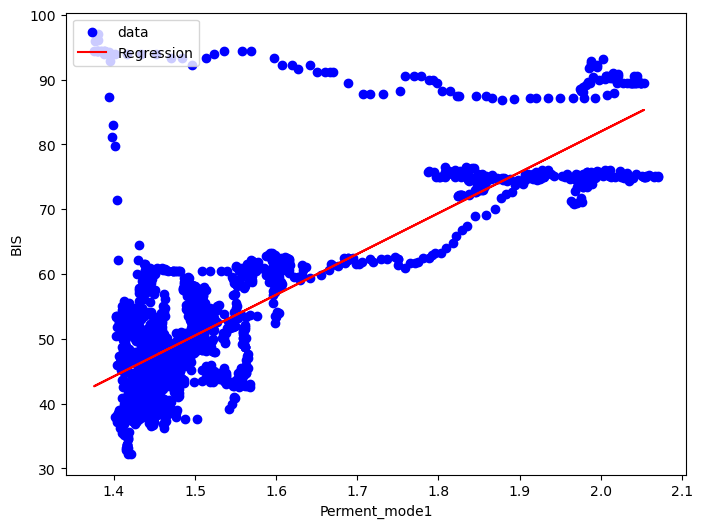

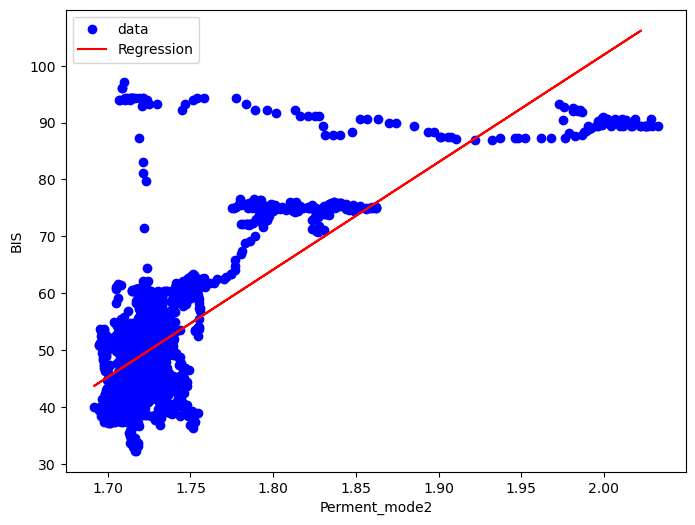

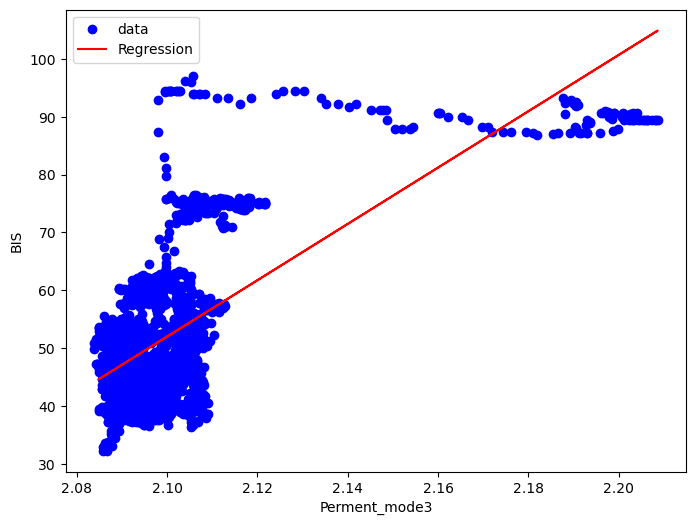

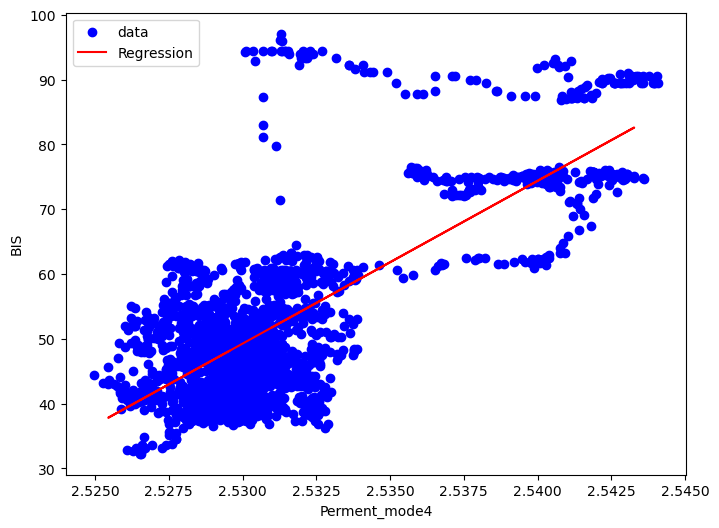

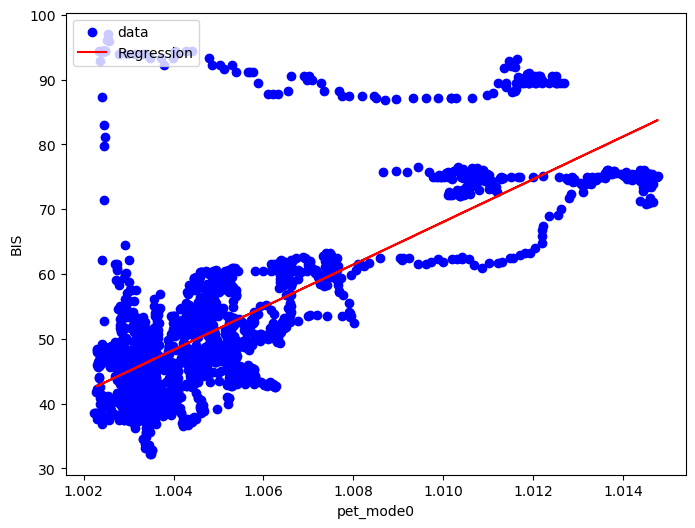

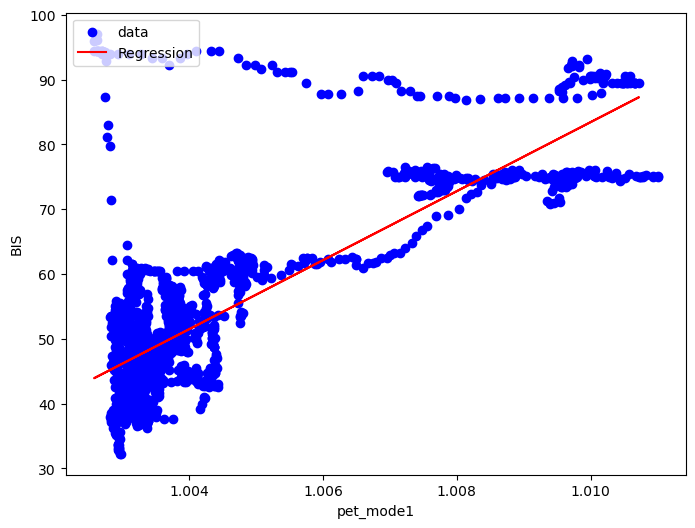

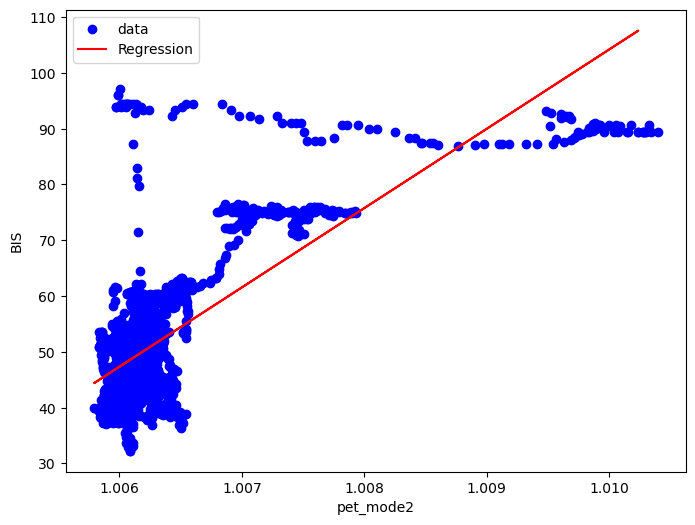

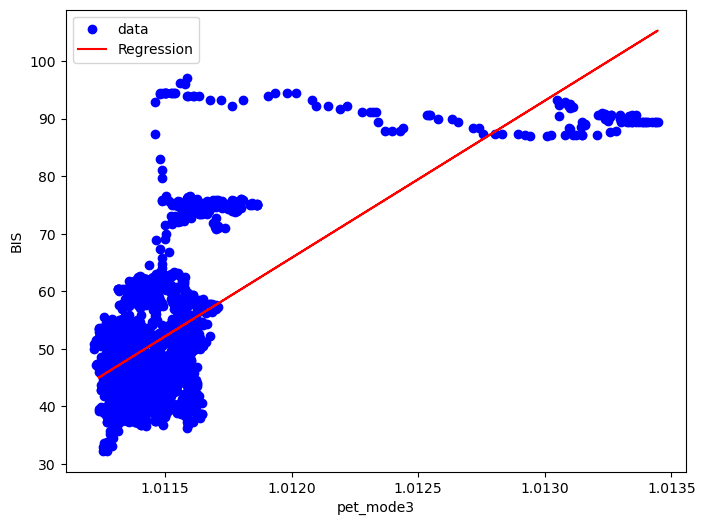

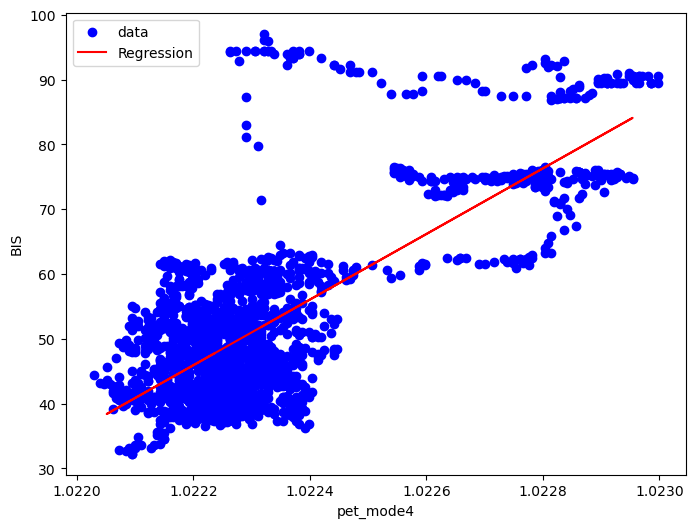

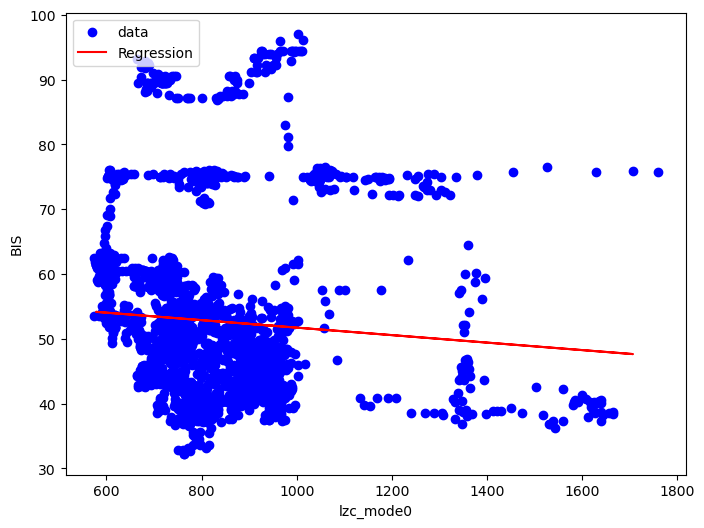

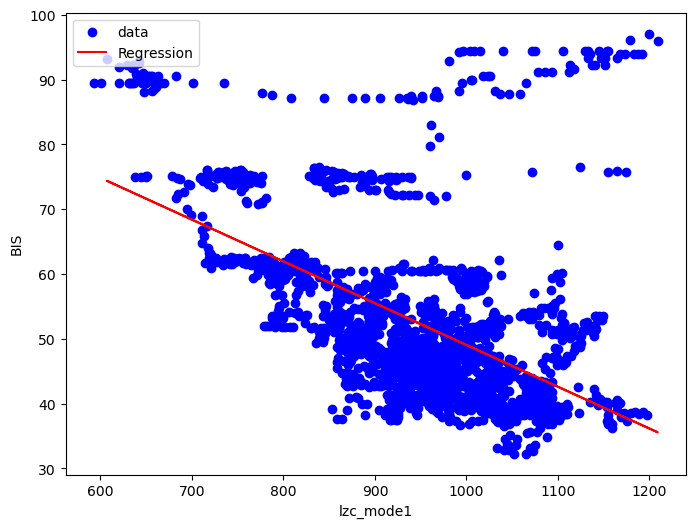

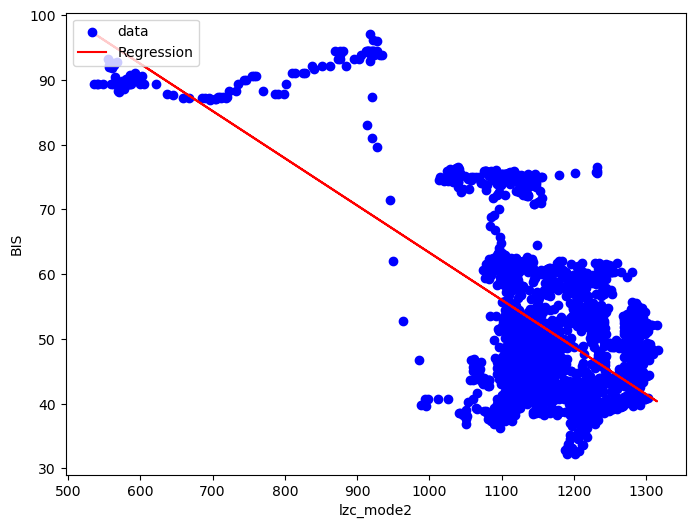

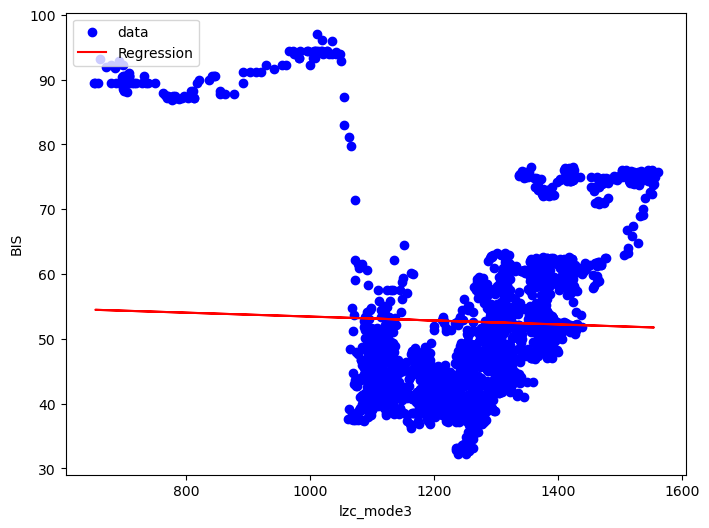

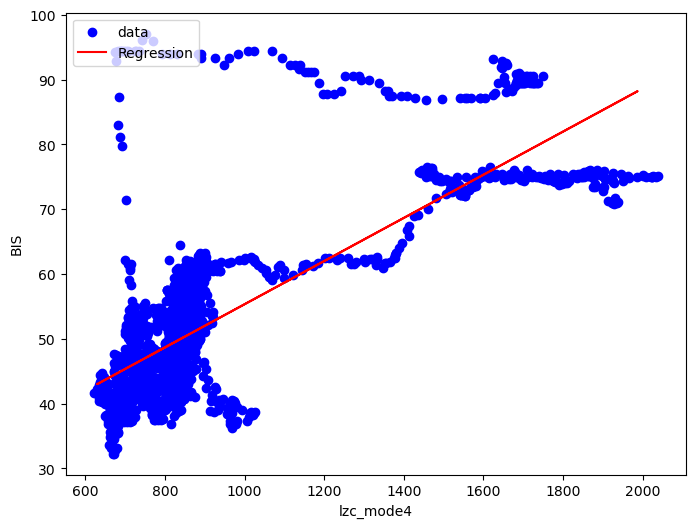

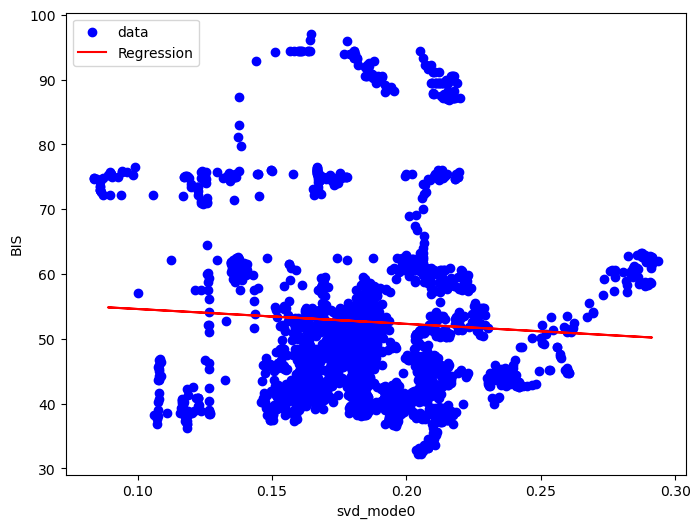

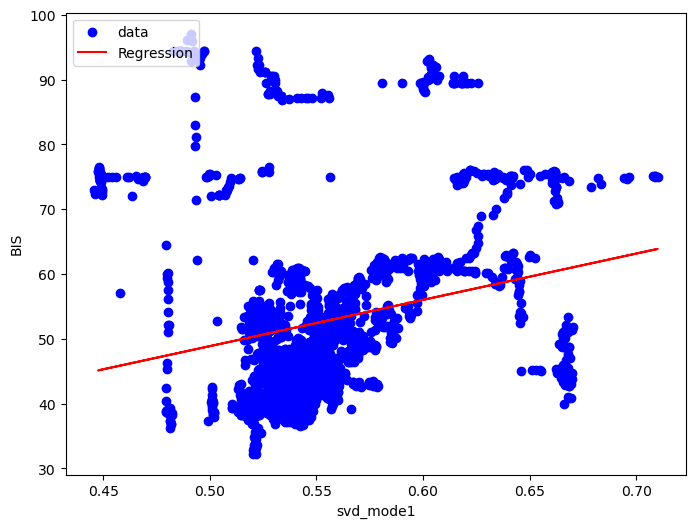

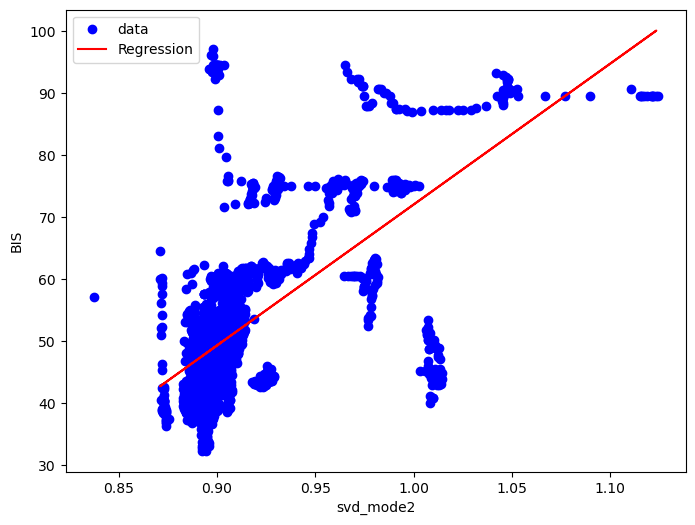

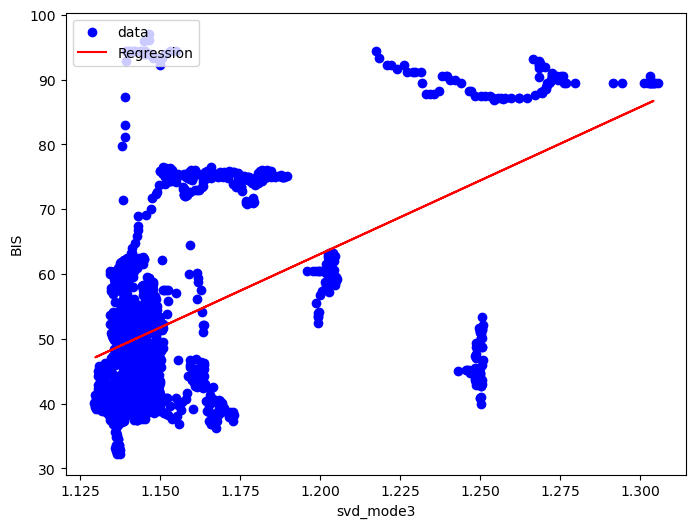

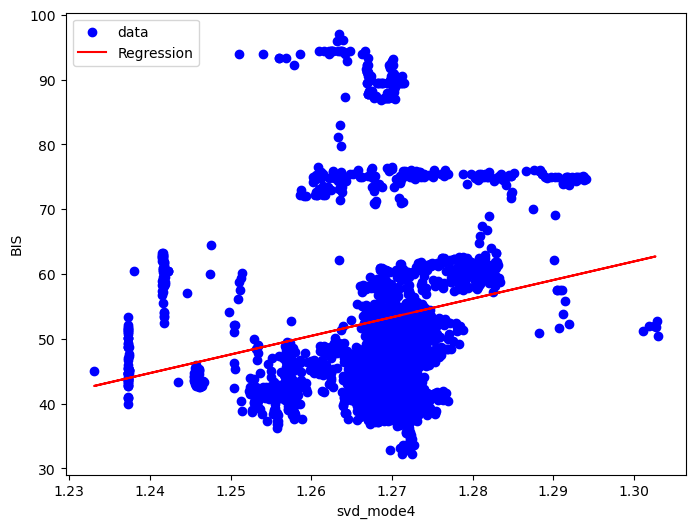

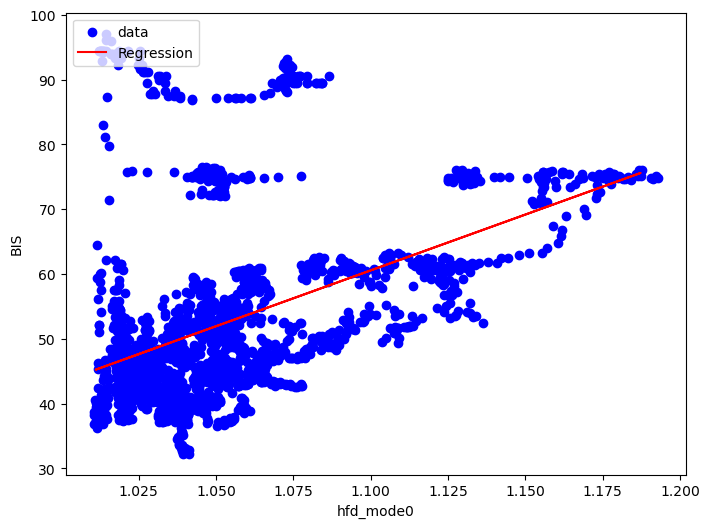

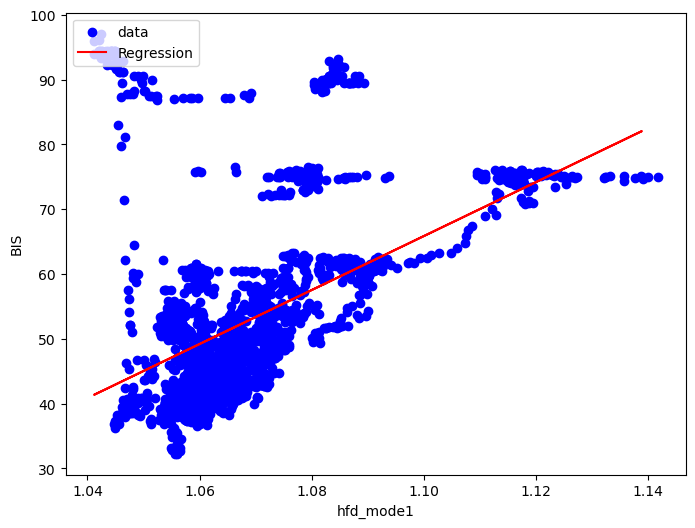

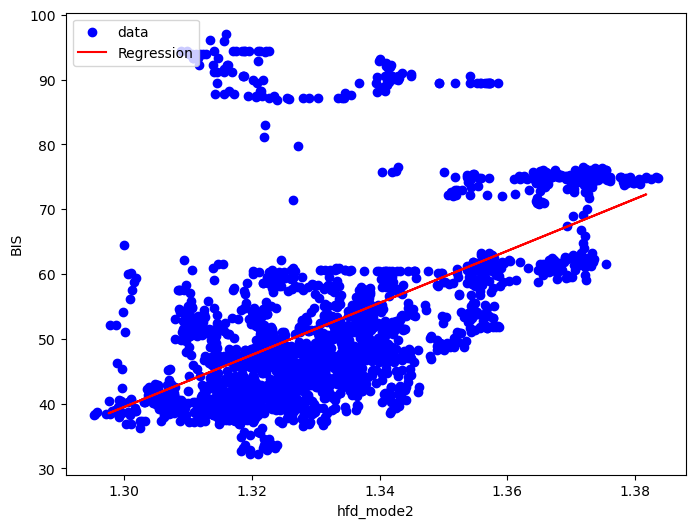

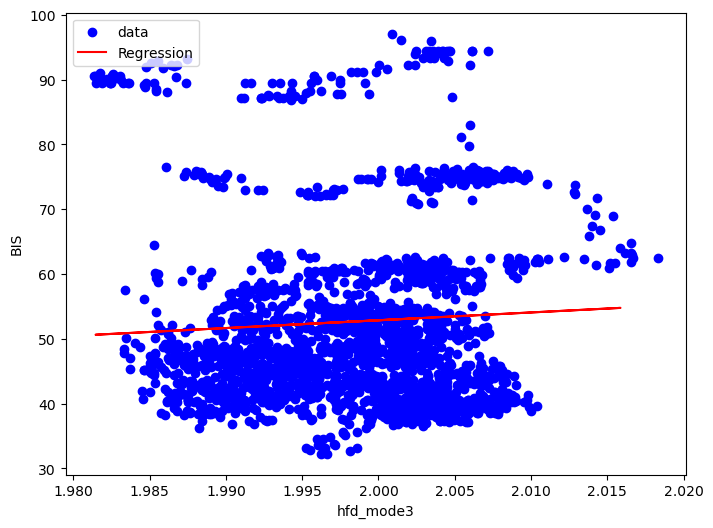

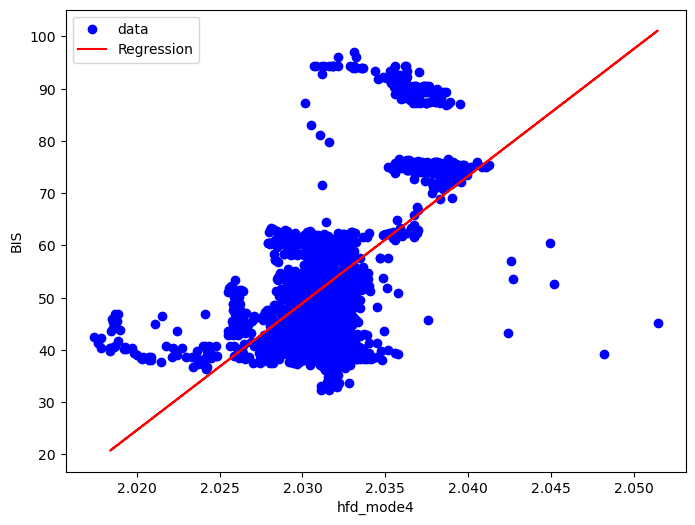

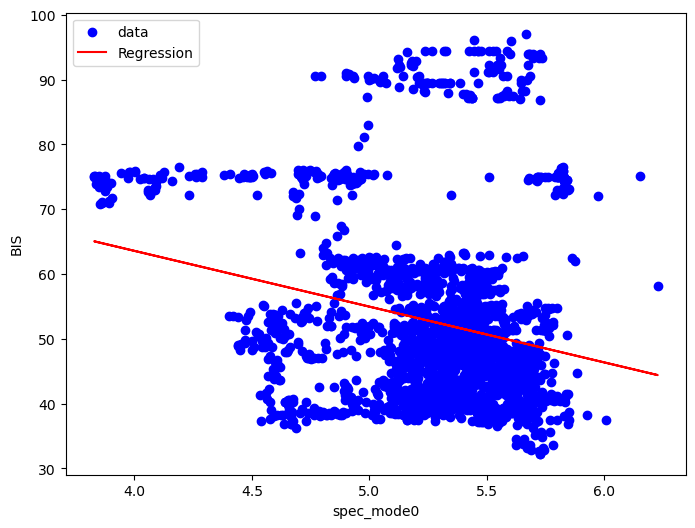

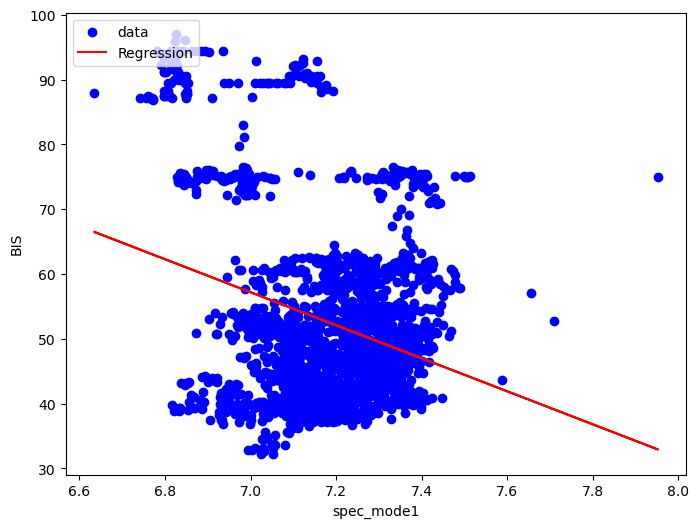

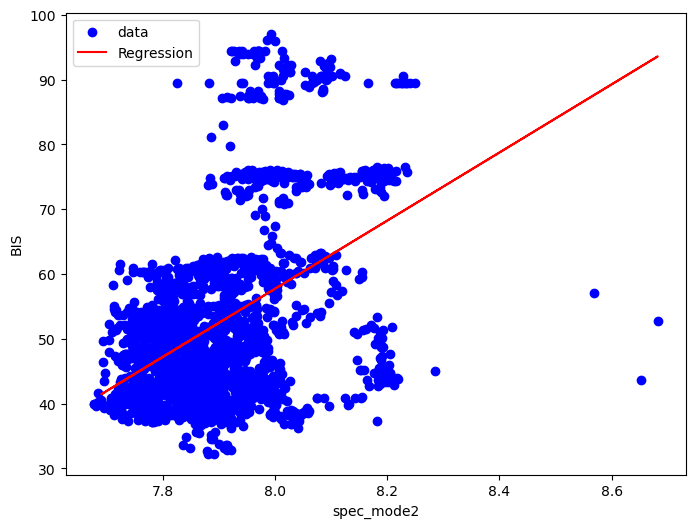

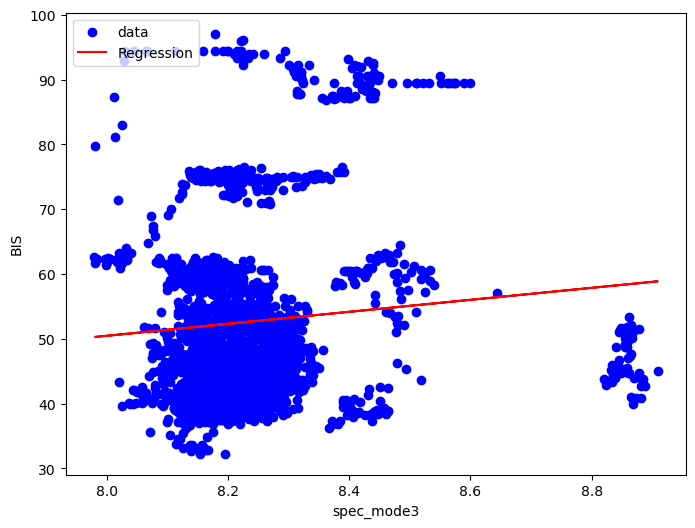

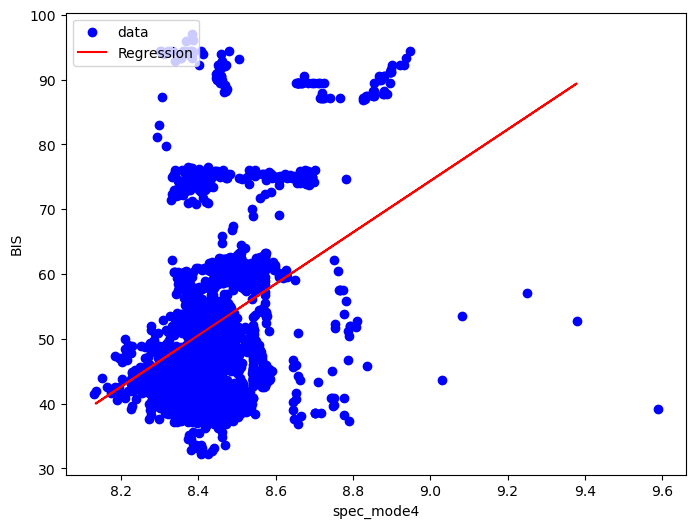

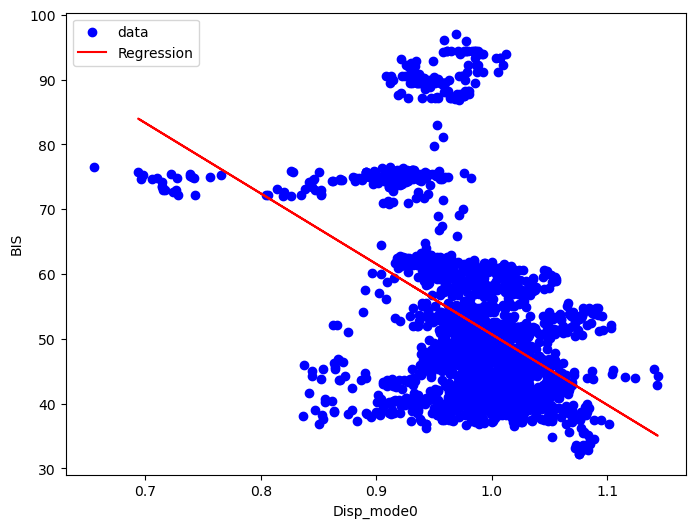

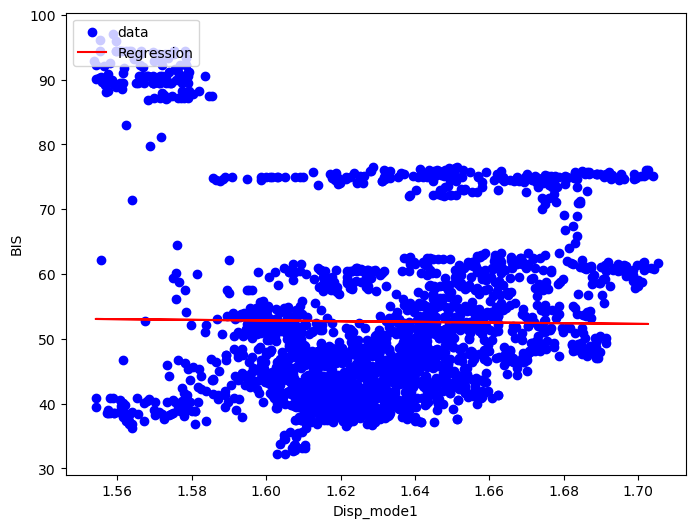

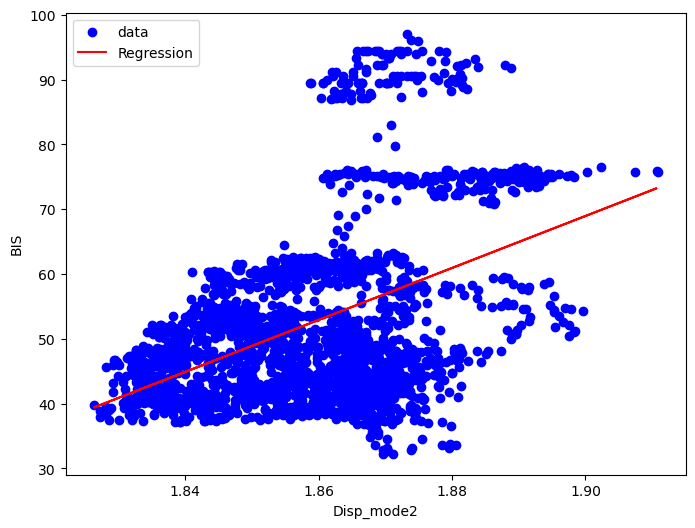

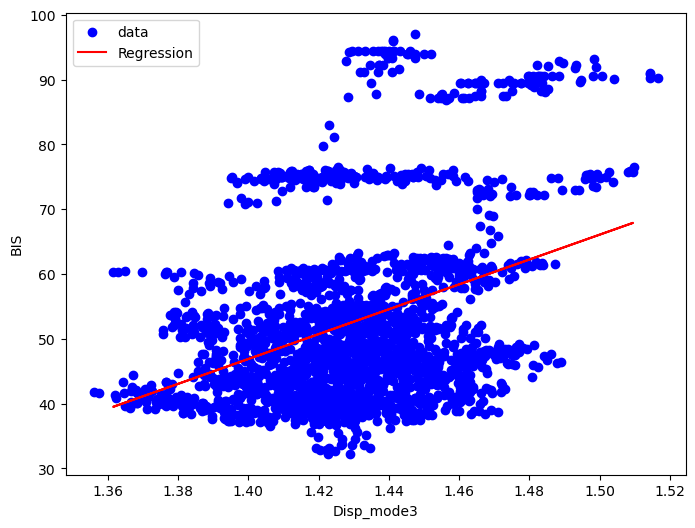

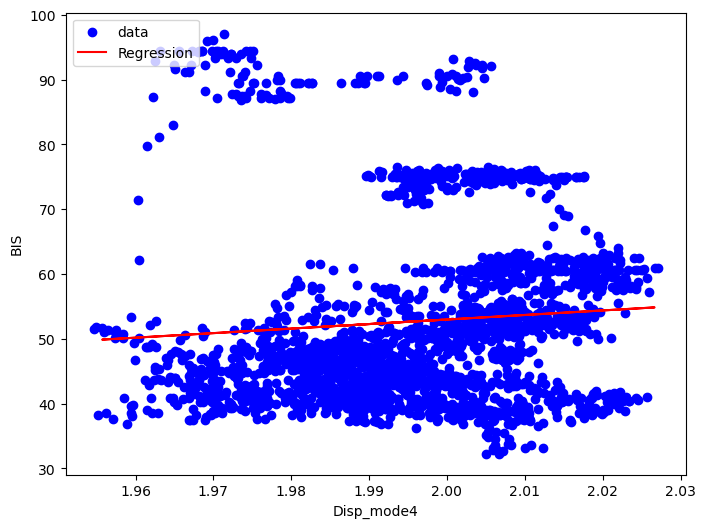

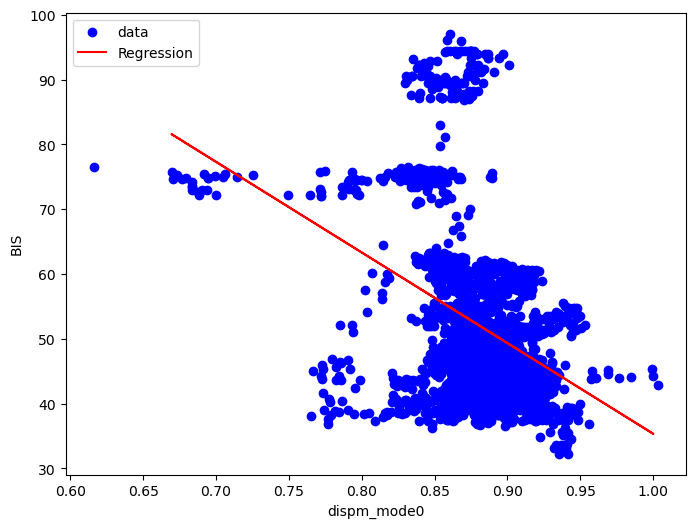

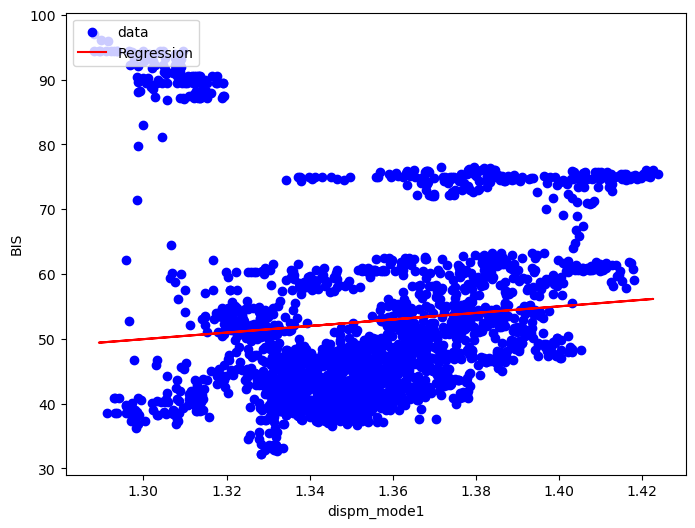

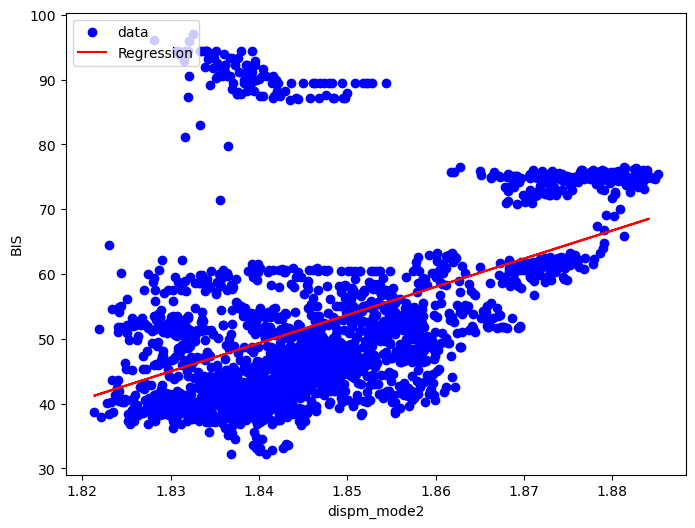

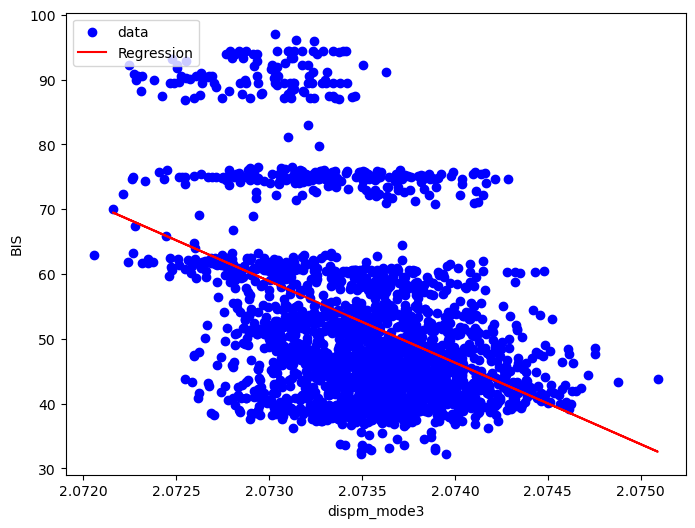

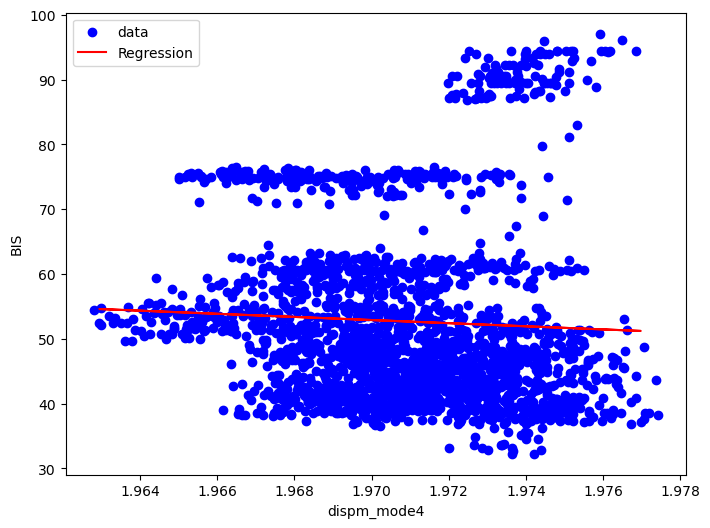

In [6]:

for column in patient_80.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_80, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
21,Perment_mode1_r2,58.053647
26,pet_mode1_r2,57.440445
34,lzc_mode4_r2,56.739929
22,Perment_mode2_r2,55.343523
27,pet_mode2_r2,53.808632
25,pet_mode0_r2,51.819922
20,Perment_mode0_r2,51.712725
29,pet_mode4_r2,51.626471
24,Perment_mode4_r2,50.412755
23,Perment_mode3_r2,40.404366


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
27      pet_mode2    0.375864
22  Perment_mode2    0.129428
32      lzc_mode2    0.121881
33      lzc_mode3    0.107651
44      hfd_mode4    0.094727
34      lzc_mode4    0.040690
3        hm_mode3    0.010581
28      pet_mode3    0.007093
54     Disp_mode4    0.006730
41      hfd_mode1    0.005398
7        hc_mode2    0.005389
51     Disp_mode1    0.005234
23  Perment_mode3    0.004989
56    dispm_mode1    0.004828
9        hc_mode4    0.004617
6        hc_mode1    0.004310
57    dispm_mode2    0.004160
8        hc_mode3    0.004132
39      svd_mode4    0.003784
21  Perment_mode1    0.003683
20  Perment_mode0    0.003553
38      svd_mode3    0.003011
35      svd_mode0    0.002484
43      hfd_mode3    0.002344
25      pet_mode0    0.002257
0        hm_mode0    0.002244
59    dispm_mode4    0.002237
45     spec_mode0    0.002140
49     spec_mode4    0.002136
37      svd_mode2    0.001983
17     detf_mode2    0.001980
15     detf_mode0    0.001967
48     spe